In [10]:
import numpy as np
import json
from PIL import Image, ImageDraw
import os
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [11]:
train_image_dir = "../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen"

image_paths_train = []

for i in os.listdir(train_image_dir):
    folder_path = os.path.join(train_image_dir, i)
    if i != '.DS_Store':
        image_paths_train.append(folder_path)

In [12]:
train_label_dir = "../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen"

label_paths_train = []

for i in os.listdir(train_label_dir):
    folder_path = os.path.join(train_label_dir, i)
    if i != '.DS_Store':
        label_paths_train.append(folder_path)

In [13]:
df_image_paths_train = pd.DataFrame({"Index": "", "Image_Path": image_paths_train})
df_label_paths_train = pd.DataFrame({"Index": "", "Target_Path": label_paths_train})

In [14]:
filter_instanceIds = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('instanceIds')]
filter_polygons = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('polygons')]
filter_labelIds = df_label_paths_train[df_label_paths_train['Target_Path'].str.contains('labelIds')]

df_label_paths_train = df_label_paths_train.drop(filter_instanceIds.index)
df_label_paths_train = df_label_paths_train.drop(filter_polygons.index)
df_label_paths_train = df_label_paths_train.drop(filter_labelIds.index)

In [15]:
index_tab = []
for el in df_image_paths_train['Image_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_leftImg8bit", "")
    index_tab.append(file_name)
df_image_paths_train['Index'] = index_tab

In [16]:
index_tab = []
for el in df_label_paths_train['Target_Path']:
    file_name = os.path.splitext(os.path.basename(el))[0]
    file_name = file_name.replace("_gtFine_color", "")
    index_tab.append(file_name)
df_label_paths_train['Index'] = index_tab

In [17]:
df_train = pd.merge(df_image_paths_train, df_label_paths_train, on='Index', how='left')
df_train

,Index,Image_Path,Target_Path
0,aachen_000079_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000079_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000079_000019_gtFine_color.png
1,aachen_000073_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000073_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000073_000019_gtFine_color.png
2,aachen_000100_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000100_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000100_000019_gtFine_color.png
3,aachen_000006_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000006_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000006_000019_gtFine_color.png
4,aachen_000037_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000037_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000037_000019_gtFine_color.png
...,...,...,...
169,aachen_000025_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000025_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000025_000019_gtFine_color.png
170,aachen_000156_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000156_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000156_000019_gtFine_color.png
171,aachen_000091_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000091_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000091_000019_gtFine_color.png
172,aachen_000050_000019,../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000050_000019_leftImg8bit.png,../Data/files/Cityscapes_gtFine_trainvaltest/gtFine/train/aachen/aachen_000050_000019_gtFine_color.png


In [18]:
from sklearn.model_selection import train_test_split

X = df_train['Image_Path']
y = df_train['Target_Path']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(139,)
(139,)
(35,)
(35,)


In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from skimage.transform import resize
from tensorflow.keras.layers import Reshape

2024-03-20 12:01:27.317184: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
# Définir une fonction pour prétraiter les images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Charger l'image en taille 224x224 (taille attendue par VGG16)
    img_array = img_to_array(img)  # Convertir l'image en tableau numpy
    return img_array

# Prétraiter les images d'entraînement
X_train_processed = np.array([preprocess_image(img_path) for img_path in X_train])

# Prétraiter les images de test
X_test_processed = np.array([preprocess_image(img_path) for img_path in X_test])

In [23]:
def preprocess_label(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Charger l'image en taille 224x224 (taille attendue par VGG16)
    img_array = img_to_array(img)  # Convertir l'image en tableau numpy
    return img_array

# Prétraiter les images d'entraînement
y_train_processed = np.array([preprocess_label(img_path) for img_path in y_train])

# Prétraiter les images de test
y_test_processed = np.array([preprocess_label(img_path) for img_path in y_test])

In [24]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Verrouillez les poids du modèle de base
base_model.trainable = False

In [34]:
# Obtenez la sortie de la dernière couche de base_model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(224 * 224 * 3, activation='sigmoid')(x)  # Modifiez la taille pour correspondre à la forme des étiquettes
output = Reshape((224, 224, 3))(output)  # Modifiez la forme pour correspondre à la forme des étiquettes

# Créer le modèle final
model = Model(inputs=base_model.input, outputs=output)

In [35]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(X_train_processed, y_train_processed, epochs=10, batch_size=32, validation_data=(X_test_processed, y_test_processed))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step - accuracy: 0.3874 - loss: -478.5054 - val_accuracy: 0.7037 - val_loss: -1429.4312
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.6979 - loss: -1424.3397 - val_accuracy: 0.7341 - val_loss: -1429.4312
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.7458 - loss: -1424.3309 - val_accuracy: 0.7416 - val_loss: -1429.4312
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step - accuracy: 0.7381 - loss: -1418.1821 - val_accuracy: 0.7416 - val_loss: -1429.4312
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step - accuracy: 0.7572 - loss: -1411.8232 - val_accuracy: 0.7416 - val_loss: -1429.4312
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.7356 - loss: -1425.4579 - val_accuracy: 0.7416 - val_loss: -1429.4312
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - accuracy: 0.7308 - loss: -1426.2957 - val_accuracy: 0.7416 - val_loss: -1429.4312
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.7427 - loss: -1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


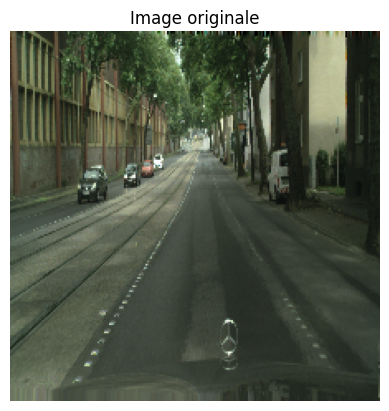

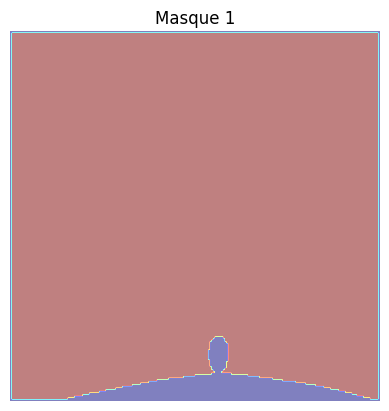

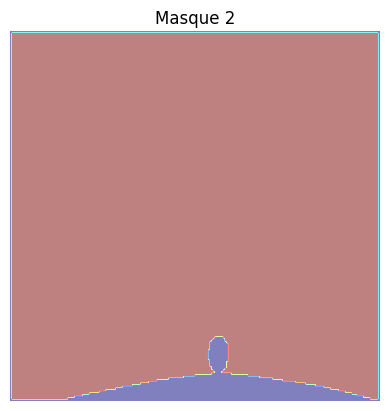

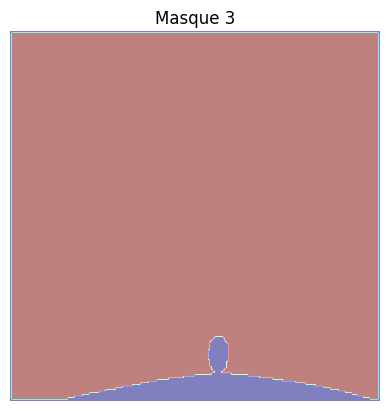

In [45]:
from tensorflow.keras.preprocessing import image

# Charger l'image de test que vous souhaitez segmenter
new_image = image.load_img("../Data/files/Cityscapes_leftImg8bit_trainvaltest/leftImg8bit/train/bochum/bochum_000000_001519_leftImg8bit.png", target_size=(224, 224))

# Convertir l'image en tableau numpy
new_image_array = image.img_to_array(new_image)

# Ajouter une dimension supplémentaire pour le batch
new_image_batch = np.expand_dims(new_image_array, axis=0)

# Faire une prédiction sur l'image avec votre modèle
prediction = model.predict(new_image_batch)

# Afficher les résultats de la prédiction
plt.imshow(new_image)
plt.title('Image originale')
plt.axis('off')
plt.show()

# Afficher chaque masque de segmentation prédit
for i in range(prediction.shape[-1]):
    plt.imshow(prediction[0, :, :, i], cmap='jet', alpha=0.5)  # Utilisez un colormap approprié pour afficher les masques de différentes couleurs
    plt.title(f'Masque {i+1}')
    plt.axis('off')
    plt.show()


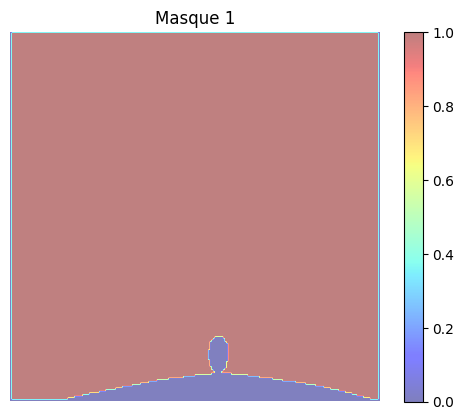

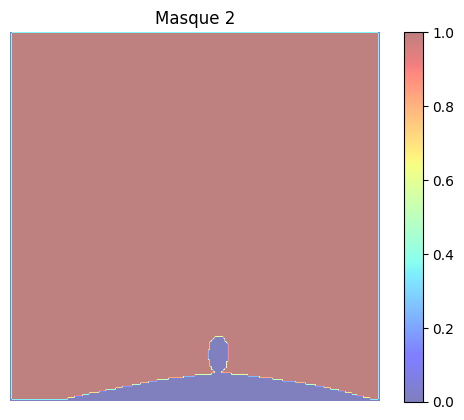

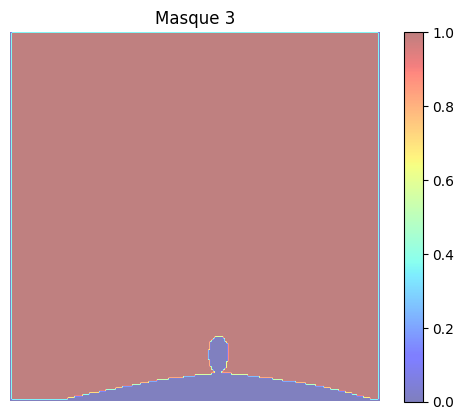

In [46]:
for i in range(prediction.shape[-1]):
    plt.imshow(prediction[0, :, :, i], cmap='jet', alpha=0.5)  # Utilisez un colormap approprié pour afficher les masques de différentes couleurs
    plt.title(f'Masque {i+1}')
    plt.axis('off')
    plt.colorbar()  # Ajoute une barre de couleur pour afficher les valeurs de la prédiction
    plt.show()